In [82]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

In [24]:
# Make position density first mouse first day
CT = np.load('data/txy_coords/CT/CT_strain0_mouse0_day0.npy')
CX = np.load('data/txy_coords/CX/CX_strain0_mouse0_day0.npy')
CY = np.load('data/txy_coords/CY/CY_strain0_mouse0_day0.npy')

# mask for HB Move Events
CT_NHB = np.load('data/txy_coords/C_idx_HB/C_idx_HB_strain0_mouse0_day0.npy')
CT_HB = ~ CT_NHB

In [25]:
start_time, stop_time = np.load('data/txy_coords/recordingStartTimeEndTime/recordingStartTimeEndTime_strain0_mouse0_day0.npy')

In [26]:
N = len(CT)

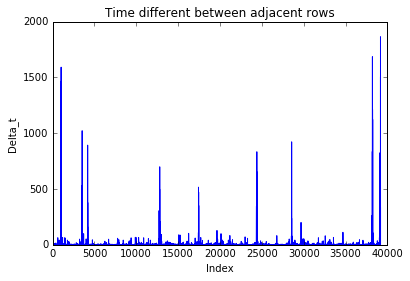

In [152]:
time_diff = CT[1:]-CT[:N-1]
plt.plot(time_diff)
plt.title('Time different between adjacent rows')
plt.xlabel('Index')
plt.ylabel('Delta_t')

In [100]:
# the proportion of the events that the mouse stays at the same location more than 1 sec
print(sum(time_diff > 1))
print(sum(time_diff > 1)/(len(time_diff))*100)
# might be too small??

7000
17.866258295


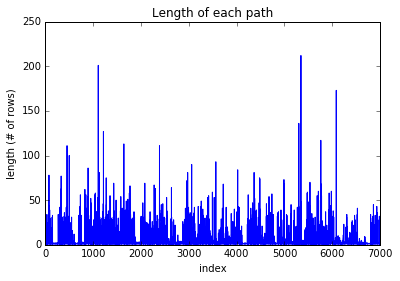

In [103]:
# Cut Out Path: 1-sec approach
# devide path if he stays at the same location more than 1 sec
sep_points = [i for i in range(N-1) if time_diff[i] > 1]
path_length = [sep_points[i+1] - sep_points[i] for i in range(len(sep_points)-1)]
plt.plot(path_length)
plt.title('Length of each path')
plt.xlabel('index')
plt.ylabel('length (# of rows)')

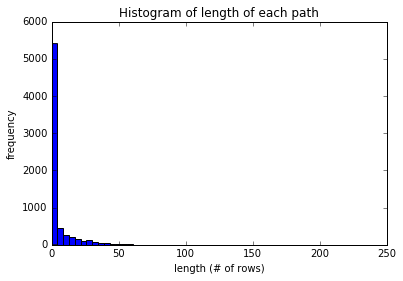

In [115]:
bins = np.linspace(0, max(path_length), 50)
plt.hist(path_length,bins)
plt.title('Histogram of length of each path')
plt.xlabel('length (# of rows)')
plt.ylabel('frequency')

In [94]:
def make_path(separations):
    start = separations[0]
    end = separations[1]
    return({'x':[CX[i] for i in range(start, end)], 'y':[CY[i] for i in range(start, end)], 't':[CT[i] for i in range(start, end)]})
path = [make_path([sep_points[i],sep_points[i+1]]) for i in range(len(sep_points)-1)]

In [95]:
# sanity check: for each path object, are the length of t and x and y all same?
print(all([len(path[i]['t']) == len(path[i]['x']) and len(path[i]['t']) == len(path[i]['y']) for i in range(len(path))]))
# sanity check: is the length of each path same as defined before?
path_length2 = [len(p['t']) for p in path]
print(path_length == path_length2)

# the number of paths
print(len(path))

# head of paths
path[:5]

True
True
6999


[{'t': [49529.760000000002],
  'x': [-10.760000000000002],
  'y': [36.113000000000021]},
 {'t': [49530.889999999999],
  'x': [-10.760000000000002],
  'y': [36.113000000000021]},
 {'t': [49696.729999999996],
  'x': [-11.046000000000001],
  'y': [37.078000000000024]},
 {'t': [49698.509999999995],
  'x': [-11.548000000000002],
  'y': [36.189000000000021]},
 {'t': [49706.589999999997],
  'x': [-10.979000000000003],
  'y': [37.033000000000023]}]

In [96]:
# filtering path which is shorter than 2,3,4,5
path2 = [p for p in path if len(p['t']) >= 2]
path3 = [p for p in path if len(p['t']) >= 3]
path4 = [p for p in path if len(p['t']) >= 4]
path5 = [p for p in path if len(p['t']) >= 5]
len(path2), len(path3), len(path4), len(path5)

(3547, 2447, 1883, 1591)

In [124]:
# Cage boundaries
YLower = 1.0; YUpper = 43.0; XUpper = 3.75; XLower = -16.25

def plot_path(p, title):
    plt.plot(p['x'], p['y'])
    plt.xlabel('x-coordinate')
    plt.xlim(XLower, XUpper)
    plt.ylabel('y-coordinate')
    plt.ylim(YLower, YUpper)
    plt.title(title)

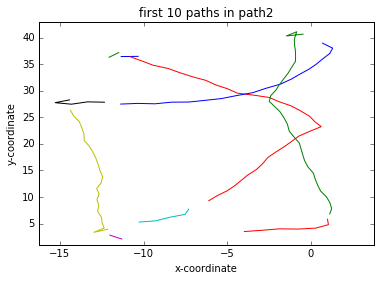

In [149]:
for i in range(10):
    plot_path(path2[i], 'first 10 paths in path2')

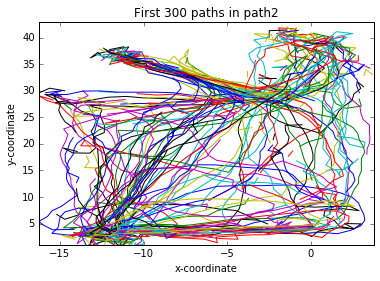

In [145]:
for i in range(300):
    plot_path(path2[i], "First 300 paths in path2")

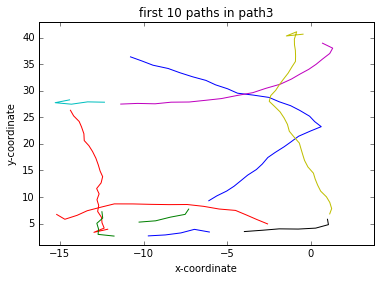

In [150]:
for i in range(10):
    plot_path(path3[i], 'first 10 paths in path3')

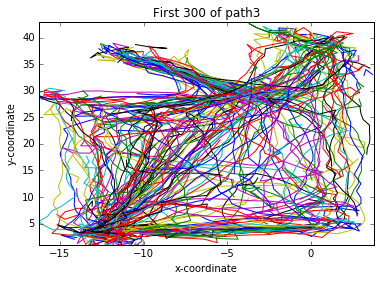

In [146]:
for i in range(300):
    plot_path(path3[i], "First 300 of path3")

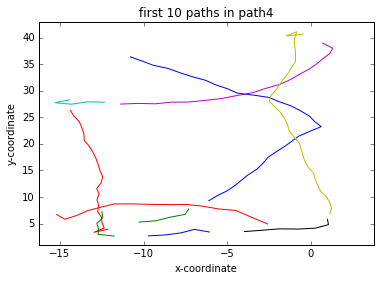

In [151]:
for i in range(10):
    plot_path(path4[i], 'first 10 paths in path4')

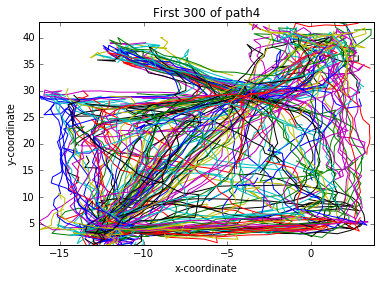

In [147]:
for i in range(300):
    plot_path(path4[i], "First 300 of path4")

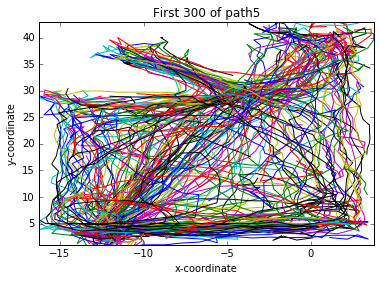

In [148]:
for i in range(300):
    plot_path(path5[i], "First 300 of path5")